In [ ]:
# Imports and Downloads
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk import FreqDist

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

using split():  ['i', 'really', 'like', 'basketball', 'its', 'fast', 'fun', 'and', 'keeps', 'you']

using word_tokenize():  ['i', 'really', 'like', 'basketball', 'its', 'fast', 'fun', 'and', 'keeps', 'you']

Word frequency distribution (excluding stopwords):
[('really', 1), ('like', 1), ('basketball', 1), ('fast', 1), ('fun', 1), ('keeps', 1), ('moving', 1), ('love', 1), ('energy', 1), ('game', 1)]


<Axes: title={'center': 'Top 10 Words (No Stopwords)'}, xlabel='Samples', ylabel='Counts'>

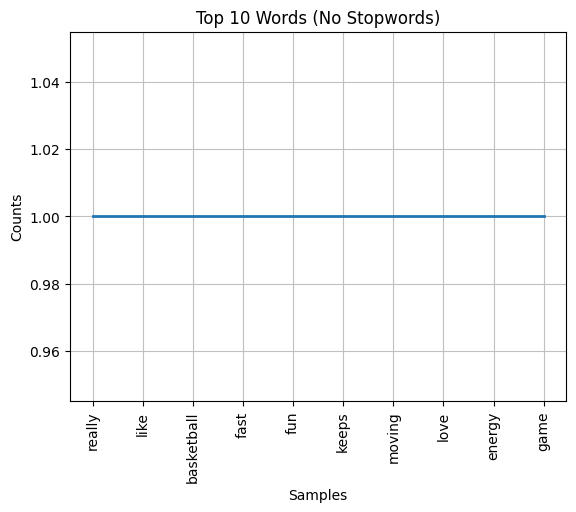

In [ ]:
text = """I really like basketball — it’s fast, fun, and keeps you moving. I love the energy of the game, whether I’m playing or just watching. There’s something awesome about making a great pass or hitting a perfect shot. Plus, it’s a cool way to hang out with friends and stay active."""

# lowercase and remove punctuation
text_clean=re.sub(r'[^\w\s]', '', text.lower())

#words and sentence tokenisation
sentence_tokens=sent_tokenize(text)
words_tokens=word_tokenize(text_clean)

#split vs word_tokenise()
words_split = text_clean.split()
print("using split(): ", words_split[:10])
print("\nusing word_tokenize(): ", words_tokens[:10])

#remove stopwords
stop_words=set(stopwords.words('english'))
filtered_tokens=[word for word in words_tokens if word.lower() not in stop_words]

#frequency ditribution
freq_dist=FreqDist(filtered_tokens)
print("\nWord frequency distribution (excluding stopwords):")
print(freq_dist.most_common(10))
freq_dist.plot(10, title="Top 10 Words (No Stopwords)")

In [ ]:
import pandas as pd
#only alphabets
alphabets=re.findall(r'[a-zA-Z]+', text_clean)
print(alphabets)

#remove stopwords
filtered_aplha=[word for word in alphabets if word.lower() not in stop_words]
print(filtered_aplha)

#stemmed vs lemmatised
stemmed_words=[PorterStemmer().stem(word) for word in filtered_aplha]
lemmatized_word=[WordNetLemmatizer().lemmatize(word) for word in filtered_aplha]
df=pd.DataFrame({'Original':filtered_aplha, 'Stemmed':stemmed_words, 'Lemmatized':lemmatized_word})
print(df);

['i', 'really', 'like', 'basketball', 'its', 'fast', 'fun', 'and', 'keeps', 'you', 'moving', 'i', 'love', 'the', 'energy', 'of', 'the', 'game', 'whether', 'im', 'playing', 'or', 'just', 'watching', 'theres', 'something', 'awesome', 'about', 'making', 'a', 'great', 'pass', 'or', 'hitting', 'a', 'perfect', 'shot', 'plus', 'its', 'a', 'cool', 'way', 'to', 'hang', 'out', 'with', 'friends', 'and', 'stay', 'active']
['really', 'like', 'basketball', 'fast', 'fun', 'keeps', 'moving', 'love', 'energy', 'game', 'whether', 'im', 'playing', 'watching', 'theres', 'something', 'awesome', 'making', 'great', 'pass', 'hitting', 'perfect', 'shot', 'plus', 'cool', 'way', 'hang', 'friends', 'stay', 'active']
      Original    Stemmed  Lemmatized
0       really     realli      really
1         like       like        like
2   basketball  basketbal  basketball
3         fast       fast        fast
4          fun        fun         fun
5        keeps       keep        keep
6       moving       move      movin

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import pandas as pd

texts = [
    "The new smartwatch is sleek and has great battery life.",
    "Breaking news: The stock market sees a major downturn today.",
    "This restaurant's pizza is delicious but a bit overpriced."
]

# Bag of words
cv = CountVectorizer()
X = cv.fit_transform(texts)
print(cv.get_feature_names_out())
print(X.toarray())

# TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)
print('\n',tfidf.get_feature_names_out())
print(tfidf_matrix.toarray())

# 3. Top 3 keywords per text
print("\nTop 3 keywords per text (by TF-IDF):\n")
feature_names = tfidf.get_feature_names_out()
for i, text in enumerate(texts):
    tfidf_scores = tfidf_matrix[i].toarray()[0]
    sorted_indices = tfidf_scores.argsort()[::-1]
    top_keywords = [feature_names[j] for j in sorted_indices[:3]]
    print(f"Text {i + 1}: {text}")
    print(f"Top 3 keywords: {top_keywords}\n")

['and' 'battery' 'bit' 'breaking' 'but' 'delicious' 'downturn' 'great'
 'has' 'is' 'life' 'major' 'market' 'new' 'news' 'overpriced' 'pizza'
 'restaurant' 'sees' 'sleek' 'smartwatch' 'stock' 'the' 'this' 'today']
[[1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1]
 [0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0]]

 ['and' 'battery' 'bit' 'breaking' 'but' 'delicious' 'downturn' 'great'
 'has' 'is' 'life' 'major' 'market' 'new' 'news' 'overpriced' 'pizza'
 'restaurant' 'sees' 'sleek' 'smartwatch' 'stock' 'the' 'this' 'today']
[[0.33046705 0.33046705 0.         0.         0.         0.
  0.         0.33046705 0.33046705 0.25132871 0.33046705 0.
  0.         0.33046705 0.         0.         0.         0.
  0.         0.33046705 0.33046705 0.         0.25132871 0.
  0.        ]
 [0.         0.         0.         0.34142622 0.         0.
  0.34142622 0.         0.         0.         0.         0.34142622
  0.34142622 0.         0.3414

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

text1 = "Artificial Intelligence (AI) is a branch of computer science that aims to create machines capable of intelligent behavior. AI enables machines to perform tasks that typically require human intelligence, such as decision-making, language processing, and visual recognition. It relies heavily on data and algorithms to learn from patterns and make predictions or decisions."
text2 = "Blockchain is a decentralized digital ledger used to record transactions across many computers. It ensures that records cannot be altered retroactively without the alteration of all subsequent blocks and the consensus of the network. Blockchain's primary use is in cryptocurrencies, but it has applications in various industries like supply chain management and secure voting systems."

#preprocess nad tokenisation
def preprocess(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    return text.split()
tokens1 = preprocess(text1)
tokens2 = preprocess(text2)

print(f"Tokens for text 1(AI): {tokens1}")
print(f"Tokens for text 2(Blockchain): {tokens2}")

# Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union
set1 = set(tokens1)
set2 = set(tokens2)
jaccard_sim = jaccard_similarity(set1, set2)
print(f"\nJaccard Similarity: {jaccard_sim}")

# Cosine similarity
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([text1, text2])
cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print(f"\nCosine Similarity: {cosine_sim[0][0]}")

# Analyze which better
print("\nAnalysis:")
if jaccard_sim > cosine_sim[0][0]:
    print("Jaccard Similarity gives better insights ")
else:
    print("Cosine Similarity gives better insights ")


Tokens for text 1(AI): ['artificial', 'intelligence', 'ai', 'is', 'a', 'branch', 'of', 'computer', 'science', 'that', 'aims', 'to', 'create', 'machines', 'capable', 'of', 'intelligent', 'behavior', 'ai', 'enables', 'machines', 'to', 'perform', 'tasks', 'that', 'typically', 'require', 'human', 'intelligence', 'such', 'as', 'decisionmaking', 'language', 'processing', 'and', 'visual', 'recognition', 'it', 'relies', 'heavily', 'on', 'data', 'and', 'algorithms', 'to', 'learn', 'from', 'patterns', 'and', 'make', 'predictions', 'or', 'decisions']
Tokens for text 2(Blockchain): ['blockchain', 'is', 'a', 'decentralized', 'digital', 'ledger', 'used', 'to', 'record', 'transactions', 'across', 'many', 'computers', 'it', 'ensures', 'that', 'records', 'cannot', 'be', 'altered', 'retroactively', 'without', 'the', 'alteration', 'of', 'all', 'subsequent', 'blocks', 'and', 'the', 'consensus', 'of', 'the', 'network', 'blockchains', 'primary', 'use', 'is', 'in', 'cryptocurrencies', 'but', 'it', 'has', 'ap


Review: The headphones are amazing! Clear sound and long battery life.
Polarity: 0.3
Subjectivity: 0.5208333333333333
Positive Review

Review: The packaging was poor and the item arrived slightly damaged.
Polarity: -0.2833333333333333
Subjectivity: 0.3833333333333333
Negative Review

Review: I’m happy with the performance so far. It works as expected.
Polarity: 0.26666666666666666
Subjectivity: 0.7999999999999999
Positive Review

Review: Very slow and laggy. I regret buying this phone.
Polarity: -0.39000000000000007
Subjectivity: 0.52
Negative Review

Review: Decent quality for the price. Nothing extraordinary but fair enough.
Polarity: 0.3
Subjectivity: 0.7666666666666666
Positive Review


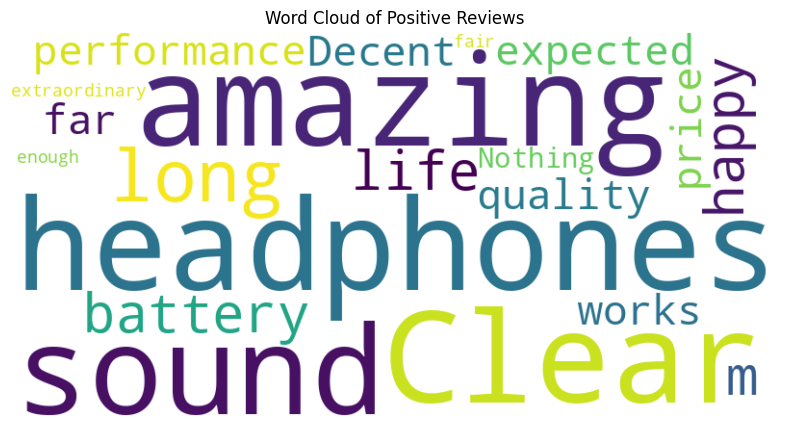

In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
reviews = [
    "The headphones are amazing! Clear sound and long battery life.",
    "The packaging was poor and the item arrived slightly damaged.",
    "I’m happy with the performance so far. It works as expected.",
    "Very slow and laggy. I regret buying this phone.",
    "Decent quality for the price. Nothing extraordinary but fair enough."
]


for review in reviews:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    print(f"\nReview: {review}")
    print(f"Polarity: {polarity}")
    print(f"Subjectivity: {subjectivity}")
    if(polarity>0):
        print("Positive Review")
    elif(polarity<0):
        print("Negative Review")
    else:
        print("Neutral Review")
positive_reviews = [review for review in reviews if TextBlob(review).sentiment.polarity > 0]
word_cloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()


In [ ]:
!pip install keras tensorflow

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.optimizers import Adam
import numpy as np
import random

text="""Cognitive computing refers to systems that simulate human thought processes in a computerized model.
It uses artificial intelligence, machine learning, natural language processing, and reasoning to solve complex problems.
Unlike traditional computing, cognitive systems can learn from data, adapt over time, and improve their performance.
These systems are designed to mimic the way the human brain works, enabling better decision-making and automation.
Cognitive computing is being applied in healthcare, finance, education, and customer service.
By understanding unstructured data and user intent, these systems can provide more accurate and context-aware responses, enhancing both efficiency and user experience."""

tokenizer=Tokenizer()
tokenizer.fit_on_texts([text])
tot_words=len(tokenizer.word_index)+1

input_sequence= []
words = text.split()
for i in range(1, len(words)):
    seq = words[:i+1]
    tokenized_seq = tokenizer.texts_to_sequences([' '.join(seq)])[0]
    input_sequence.append(tokenized_seq)

max_seq_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

x=input_sequences[:, :-1]
y=input_sequences[:, -1]
y=to_categorical(y, num_classes=tot_words)

model=Sequential()
model.add(Embedding(tot_words, 10, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(tot_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

def generate_text(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text
print(generate_text("Cognitive computing", 5))
print(generate_text("data", 4))
print(generate_text("These systems", 6))


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Cognitive computing better better better better better
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
data better better better better
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
These systems that that that that brain that
